In [127]:
import time

start_time = time.time()

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
import numpy as np
import spacy
import pandas as pd
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
import heapq
import yaml
from nltk.stem import WordNetLemmatizer, PorterStemmer

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from scipy.special import softmax
import numpy as np
from array import array
import copy
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_lg')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# df = pd.read_csv('./scraper/archive/react-useeffect-final-clean.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])
df = pd.read_csv('./scraper/archive/javascript-clean.csv')


# query = 'Reverse binary tree'
# query = 'convert date to string'
# query = 'Useeffect hook rerenders infinitely'
# query = 'Is JavaScript a case-sensitive language'
query = 'Is JavaScript a case-sensitive language'
# query = 'Fetching data - useEffect hook'
# query 3 = 'How to use the useEffect hook?'
# query 4 = "useEffect hook doesn't work"
# query 5 = "Use effect hook with use state"

print(df.shape)

print("\n")
print("All Columns DF")
df.columns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\User\AppData\Local\Temp\ipykernel_15264\95933683.py:35: DtypeWarning: Columns (1,3,4,7,9,10,11,13,14,15,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./scraper/archive/javascript-clean.csv')


(101724, 22)


All Columns DF


Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'TYPE', 'COMMENTID', 'COMMENTSCORE',
       'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID',
       'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS',
       'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME',
       'ANSWERCMTVOTECOUNTS'],
      dtype='object')

In [128]:
ALL_COLS = ["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"]

dPOST  = pd.DataFrame(columns=ALL_COLS)
dPOST = df.copy();
dPOST = dPOST.drop(columns=['COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dPOST = dPOST[dPOST['TYPE'] == 'post']

dfPC = pd.DataFrame(columns=ALL_COLS)
dfPC = df.copy();
dfPC = dfPC.drop(columns=['ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dfPC = dfPC[dfPC['TYPE'] == 'post_comment']

dfA = pd.DataFrame(columns=ALL_COLS)
dfA = df.copy();
dfA = dfA.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])

dfAAC = dfA[dfA['TYPE'] == 'answer']

dFAC = pd.DataFrame(columns=ALL_COLS)
dFAC = df.copy();
dFAC = dFAC.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS'])
dFACT = dFAC[dFAC['TYPE'] == 'answer_comment']
display(dFACT.head(3))

print("Post DF")
print(dPOST.columns)
print('\n')

print("Post Comment DF")
print(dfPC.columns)
print('\n')

print("Answer DF")
print(dfAAC.columns)
print('\n')

print("Answer Comment DF")
print(dFACT.columns)
print('\n')

POSTID                                     POSTTITLE            TYPE    ANSWERID  ANSWERCMTID                                                                                                                                                                                                                                                                                                                                                                                                                          ANSWERCMTTEXT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ANSWERCMTBODY     ANSWERCMTDATETIME  ANSWERCMTVOTECOUNTS
62644  36280818  How to convert file to base64 in JavaScript?  answer_comment  36281449.0   75927236.0                                                                                                                                                                                                                                                                                                  read more about FileReader API: developer.mozilla.org/en-US/docs/Web/API/FileReader and browser support: caniuse.com/#feat=filereader  ('\n                \n                <span class="comment-copy">read more about FileReader API: <a href="https://developer.mozilla.org/en-US/docs/Web/API/FileReader" rel="nofollow noreferrer">developer.mozilla.org/en-US/docs/Web/API/FileReader</a> and browser support: <a href="http://caniuse.com/#feat=filereader" rel="nofollow noreferrer">caniuse.com/#feat=filereader</a></span>\n                \n                <div class="d-inline-flex ai-center">\n–&nbsp;<a href="/users/1737158/lukas-liesis" title="23,976 reputation" class="comment-user">Lukas Liesis</a>\n                </div>\n      ...  Jun 9, 2017 at 19:16                  3.0
62645  36280818  How to convert file to base64 in JavaScript?  answer_comment  36281449.0   81338095.0  I tried to use return reader.result from the getBase64() function (rather than using console.log(reader.result)) because i want to capture the base64 as a variable (and then send it to Google Apps Script). I called the function with: var my_file_as_base64 = getBase64(file) and then tried to print to console with console.log(my_file_as_base64 ) and just got undefined. How can I properly assign the base64 to a variable?  ('\n                \n                <span class="comment-copy">I tried to use <code>return reader.result</code> from the <code>getBase64()</code> function (rather than using <code>console.log(reader.result)</code>) because i want to capture the base64 as a variable (and then send it to Google Apps Script).  I called the function with: <code>var my_file_as_base64 = getBase64(file)</code> and then tried to print to console with <code>console.log(my_file_as_base64 )</code> and just got <code>undefined</code>.  How can I properly assign the base64 to a variable?</span>\n                \n   ...   Nov 9, 2017 at 5:35                 20.0
62646  36280818  How to convert file to base64 in JavaScript?  answer_comment  36281449.0   81381618.0                                                                                                                                                                                                                                                                                                                                I made a question out of the above comment if anyone can answer. stackoverflo

Post DF
Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'TYPE'],
      dtype='object')


Post Comment DF
Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'TYPE', 'COMMENTID', 'COMMENTSCORE',
       'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME'],
      dtype='object')


Answer DF
Index(['POSTID', 'POSTTITLE', 'TYPE', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY',
       'ANSWERDATETIME', 'ANSWERVOTECOUNTS'],
      dtype='object')


Answer Comment DF
Index(['POSTID', 'POSTTITLE', 'TYPE', 'ANSWERID', 'ANSWERCMTID',
       'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME',
       'ANSWERCMTVOTECOUNTS'],
      dtype='object')




# Beginning of Idea A

### 1. String similarity to find related post

In [129]:
unique_values = df['POSTTITLE'].unique()
print("There are a total of {} unique titles".format(len(unique_values)))

There are a total of 16262 unique titles


#### 1.1 Fuzzy Wuzzy

In [130]:
def calPartialRatio (str1, str2):
    return fuzz.partial_ratio(str1, str2)

def calTokenSortRatio (str1, str2):
    return fuzz.token_sort_ratio(str1, str2)

fuzzywuzzy_df = pd.DataFrame(columns=['postId', 'title', 'partial_ratio', 'token_sort_ratio'])
for unique_value in unique_values:
    # find the postId of the unique value
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    fuzzywuzzy_df = pd.concat([fuzzywuzzy_df, pd.DataFrame({'postId': postId , 'title': unique_value, 'partial_ratio': calPartialRatio(unique_value, query), 'token_sort_ratio': calTokenSortRatio(unique_value, query)}, index=[0])], )

matchesPR = fuzzywuzzy_df.sort_values(by=['partial_ratio'], ascending=False)
matchesPR = matchesPR[matchesPR['partial_ratio'] > 50]

matchesTS = fuzzywuzzy_df.sort_values(by=['token_sort_ratio'], ascending=False)
matchesTS = matchesTS[matchesTS['token_sort_ratio'] > 50]

Top10MathesMerged = pd.concat([matchesTS, matchesPR]).drop_duplicates()
Top10MathesMerged['average'] = (Top10MathesMerged['token_sort_ratio'] + Top10MathesMerged['partial_ratio']) / 2
Top10MathesMerged = Top10MathesMerged.sort_values(by=['average'], ascending=False)


Top10MathesMerged = Top10MathesMerged[Top10MathesMerged['average'] > 60]
display(Top10MathesMerged)
print("{} number of titles found".format(len(Top10MathesMerged)))

postId                                                          title partial_ratio token_sort_ratio average
0  42400548                     Are javascript object keys case sensitive?            62               72    67.0
0  12484386                 Access JavaScript property case-insensitively?            72               55    63.5
0  74594916                                  JavaScript play audio segment            66               59    62.5
0  26709524                                Javascript - Compiled language?            58               66    62.0
0   8275006                                         JavaScript reset event            68               56    62.0
0  25172671                                          JavaScript Data Types            71               53    62.0
0   3366188                                                JavaScript eval            80               44    62.0
0    518000   Is JavaScript a pass-by-reference or pass-by-value language?            62               61    61.5
0  36011227                        JavaScript check if time ranges overlap            59               64    61.5
0   7766203                 Run JavaScript after every time page is loaded            59               64    61.5
0  74324194                                     Maps JavaScript API shapes            65               58    61.5
0   2231952                       Loading remote JavaScript file in a page            51               71    61.0
0  75096278                                        Hide Javascript on site            61               61    61.0
0   2949370                                       JavaScript onfocus event            71               51    61.0
0  74160148  Separate JavaScript positive and negative numbers [duplicate]            62               59    60.5
0   6621631                                 JavaScript always returns true            63               58    60.5

16 number of titles found


## 2. Group all comments into post

In [131]:
class GroupedComments: 
    def __init__(self, title, post, post_comments, answers, answer_comments): 
        self.title = title
        self.post = post
        self.post_comments = post_comments
        self.answers = answers
        self.answer_comments = answer_comments
        
def grouping(titleArr): 
    grouped = []
    for title in titleArr:
        try:
            post = dPOST[dPOST['POSTTITLE'].str.contains(title)]
            post_comments = dfPC[dfPC['POSTTITLE'].str.contains(title)]
            answers = dfAAC[dfAAC['POSTTITLE'].str.contains(title)]
            answer_comments = dFACT[dFACT['POSTTITLE'].str.contains(title)]
            grouped.append(GroupedComments(title, post, post_comments, answers, answer_comments))
        except Exception as e:
            pass
        
    return grouped 

allcommentsGrouped = grouping(Top10MathesMerged['title'].tolist())

print(len(allcommentsGrouped))

display(allcommentsGrouped[2].post_comments)
display(allcommentsGrouped[2].answers)
display(allcommentsGrouped[2].answer_comments)

16


Empty DataFrame
Columns: [POSTID, POSTLINK, POSTTITLE, POSTBODY, POSTDATE, POSTVOTECOUNTS, TYPE, COMMENTID, COMMENTSCORE, COMMENTUSERNAME, COMMENTTEXT, COMMENTDATETIME]
Index: []

Empty DataFrame
Columns: [POSTID, POSTTITLE, TYPE, ANSWERID, ANSWERTEXT, ANSWERBODY, ANSWERDATETIME, ANSWERVOTECOUNTS]
Index: []

Empty DataFrame
Columns: [POSTID, POSTTITLE, TYPE, ANSWERID, ANSWERCMTID, ANSWERCMTTEXT, ANSWERCMTBODY, ANSWERCMTDATETIME, ANSWERCMTVOTECOUNTS]
Index: []

In [132]:
allCommentsGroupedCleanedDict = {}
for idx, item in enumerate(allcommentsGrouped):
    comments = []
    answers = []
    answers_cmts = []
    
    if (item.post_comments['COMMENTTEXT'].shape[0] > 0):
      for (index, comment) in item.post_comments['COMMENTTEXT'].items():
        comment_idx = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTID'].tolist()[0]
        comment_votes = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTSCORE'].tolist()[0]
        comment_dt = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTDATETIME'].tolist()[0]
        if str(comment) != 'nan':
          comments.append({
            "comment": comment, 
            "id": comment_idx,
            "votes": comment_votes,
            "datetime": comment_dt
          })
    comments_joined = ' '.join([str(elem['comment']) for elem in comments])

    if (item.answers['ANSWERBODY'].shape[0] > 0):
      for (index, answer) in item.answers['ANSWERBODY'].items():
        answer_idx = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERID'].tolist()[0]
        answer_votes = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERVOTECOUNTS'].tolist()[0]
        answer_dt = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERDATETIME'].tolist()[0]
        if str(answer) != 'nan':
          answers.append({
            "answer": answer,
            "id": answer_idx,
            "votes": answer_votes,
            "datetime": answer_dt
          })
        
    answers_joined = ' '.join([str(elem['answer']) for elem in answers])
    
    for (index, answer_cmt) in item.answer_comments['ANSWERCMTBODY'].items():
      answer_cmt_idx = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTID'].tolist()[0]
      answer_cmt_votes = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTVOTECOUNTS'].tolist()[0]
      answer_cmt_dt = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTDATETIME'].tolist()[0]
      if str(answer_cmt) != 'nan':
        answers_cmts.append({
          "answer_cmt": answer_cmt,
          "id": 1,
          "votes": answer_cmt_votes,
          "datetime": answer_cmt_dt
        })
        
    answers_cmts_joined = ' '.join([str(elem['answer_cmt']) for elem in answers_cmts])
    
    allCommentsGroupedCleanedDict[item.title] = {
      "comments": comments,
      "answers": answers,
      "answer_comments": answers_cmts,
      "comments_joined": comments_joined,
      "answers_joined": answers_joined,
      "answers_cmts_joined": answers_cmts_joined
    }

print("{} number of post instances".format(len(allCommentsGroupedCleanedDict)))

print(yaml.dump(allCommentsGroupedCleanedDict, allow_unicode=True, default_flow_style=False))

16 number of post instances
Access JavaScript property case-insensitively?:
  answer_comments:
  - answer_cmt: '(''\n                \n                <span class="comment-copy">I
      was curious, what documentation comments style is from. Then I found <a href="https://jsdoc.app/about-getting-started.html"
      rel="nofollow noreferrer">jsdoc.app/about-getting-started.html</a></span>\n                \n                <div
      class="d-inline-flex ai-center">\n–&nbsp;<a href="/users/52277/michael-freidgeim"
      title="25,962 reputation" class="comment-user">Michael Freidgeim</a>\n                </div>\n                <span
      class="comment-date" dir="ltr"><a class="comment-link" href="#comment109800477_47538066"
      aria-label="Link to comment"><span title="2020-05-29 08:26:09Z, License: CC
      BY-SA 4.0" class="relativetime-clean">May 29, 2020 at 8:26</span></a></span>\n            '',)'
    datetime: May 29, 2020 at 8:26
    id: 1
    votes: 0.0
  - answer_cmt: '(''\

In [133]:
print(allCommentsGroupedCleanedDict)

{'Are javascript object keys case sensitive?': {'comments': [{'comment': "JavaScript doesn't have dictionaries, it has objects. Aside from that, strings (which is really what you are talking about) are always case-sensitive.", 'id': 'comment-71948108', 'votes': 3.0, 'datetime': '2017-02-22 19:28:32Z, License: CC BY-SA 3.0'}, {'comment': 'yes are case sensitive, but not dictionaries, only objects, but in newer revisions exists Map', 'id': 'comment-71948109', 'votes': 1.0, 'datetime': '2017-02-22 19:28:33Z, License: CC BY-SA 3.0'}, {'comment': 'You can always reduce the input to lower case and just compare everything as lower case.', 'id': 'comment-71948145', 'votes': 0.0, 'datetime': '2017-02-22 19:29:20Z, License: CC BY-SA 3.0'}, {'comment': '<a href="http://stackoverflow.com/questions/12484386/access-javascript-property-case-insensitively" title="access javascript property case insensitively">stackoverflow.com/questions/12484386/…</a>', 'id': 'comment-71948146', 'votes': 0.0, 'datetim

## 3. Preprocessing

In [134]:
test_text = ('\n<p>You have to convert the response to json <a href="https://google.com">Please Look at this link</a> with await <a href="https://google.com">await</a> response.json();\nand then use setState.</p>\n\n<pre class="lang-js s-code-block"><code class="hljs language-javascript"><span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> {         \n        <span class="hljs-variable language_">console</span>.<span class="hljs-title function_">log</span>(<span class="hljs-string">"useEffect TopTen has been called!"</span>);   \n        <span class="hljs-keyword">const</span> <span class="hljs-title function_">fetchdata</span> = <span class="hljs-keyword">async</span> (<span class="hljs-params"></span>) =&gt; {\n        <span class="hljs-keyword">const</span> response = <span class="hljs-keyword">await</span> api.<span class="hljs-title function_">topTen</span>();  <span class="hljs-comment">// this calls axios(url)</span>\n        <span class="hljs-keyword">const</span> responseData = <span class="hljs-keyword">await</span> response.<span class="hljs-title function_">json</span>();\n        <span class="hljs-title function_">setLoading</span>(<span class="hljs-literal">false</span>);\n        <span class="hljs-title function_">setTopten</span>(responseData.<span class="hljs-property">data</span>);    \n        <span class="hljs-title function_">setError</span>(responseData.<span class="hljs-property">error</span>);    \n    };\n\n    fetchdata ();     \n}, []);\n</code></pre>\n    ',)
print(str(test_text))

('\n<p>You have to convert the response to json <a href="https://google.com">Please Look at this link</a> with await <a href="https://google.com">await</a> response.json();\nand then use setState.</p>\n\n<pre class="lang-js s-code-block"><code class="hljs language-javascript"><span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> {         \n        <span class="hljs-variable language_">console</span>.<span class="hljs-title function_">log</span>(<span class="hljs-string">"useEffect TopTen has been called!"</span>);   \n        <span class="hljs-keyword">const</span> <span class="hljs-title function_">fetchdata</span> = <span class="hljs-keyword">async</span> (<span class="hljs-params"></span>) =&gt; {\n        <span class="hljs-keyword">const</span> response = <span class="hljs-keyword">await</span> api.<span class="hljs-title function_">topTen</span>();  <span class="hljs-comment">// this calls axios(url)</span>\n        <span class="hljs-keyw

In [135]:
from nltk.corpus import stopwords


stopwords = set(stopwords.words('english'))

#### 3.1 Finding tech related stop words

In [136]:
# adding stopwords to the list
engineering_stop_words=['able','above-mentioned','accordingly','across','along','already','alternatively','always','among','and/or','anything','anywhere','better','disclosure','due','easily','easy','eg','either','elsewhere','enough','especially','essentially','et','al','etc','eventually','excellent','finally','furthermore','good','hence','he/she','him/her','his/her','ie','ii','iii','instead','later','like','little','many','may','meanwhile','might','moreover','much','must','never','often','others','otherwise','overall','rather','remarkably','significantly','simply','sometimes','specifically','straight','forward','substantially','thereafter','therebetween','therefor','therefrom','therein','thereinto+','thereon','therethrough','therewith','together','toward','towards','typical','typically','upon','via','vice','versa','whatever','whereas','whereat','wherever','whether','whose','within','without','yet']
stopwords.update(engineering_stop_words)

print(engineering_stop_words)
print(stopwords)

['able', 'above-mentioned', 'accordingly', 'across', 'along', 'already', 'alternatively', 'always', 'among', 'and/or', 'anything', 'anywhere', 'better', 'disclosure', 'due', 'easily', 'easy', 'eg', 'either', 'elsewhere', 'enough', 'especially', 'essentially', 'et', 'al', 'etc', 'eventually', 'excellent', 'finally', 'furthermore', 'good', 'hence', 'he/she', 'him/her', 'his/her', 'ie', 'ii', 'iii', 'instead', 'later', 'like', 'little', 'many', 'may', 'meanwhile', 'might', 'moreover', 'much', 'must', 'never', 'often', 'others', 'otherwise', 'overall', 'rather', 'remarkably', 'significantly', 'simply', 'sometimes', 'specifically', 'straight', 'forward', 'substantially', 'thereafter', 'therebetween', 'therefor', 'therefrom', 'therein', 'thereinto+', 'thereon', 'therethrough', 'therewith', 'together', 'toward', 'towards', 'typical', 'typically', 'upon', 'via', 'vice', 'versa', 'whatever', 'whereas', 'whereat', 'wherever', 'whether', 'whose', 'within', 'without', 'yet']
{'he/she', 's', 'eithe

In [137]:
# translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
# translate_table.update(dict((ord(char), None) for char in string.digits))

# # find tech related stop words
# tech_stopwords = set(stopwords.words('english'))

# remove stopwords from the text
temp_text = "Imagine if that was a Web Socket and we were scheduling a new heartbeat tick every time we remounted; the server would be very angry at our apps heart palpitations."
def remove_stopwords(text):
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stopwords]
    text = " ".join(text)
    return text
  
# remove stopwords from the text
print(remove_stopwords(temp_text))

imagine web socket scheduling new heartbeat tick every time remounted; server would angry apps heart palpitations.


#### 3.2 Extract url from text

In [138]:
def extractUrl(text):
    # find a tag
    a_tag = re.findall(r'<a.*?href=[\'"](.*?)[\'"].*?>(.*?)</a>', text)
    return a_tag
  
print(extractUrl(str(test_text)))

[('https://google.com', 'Please Look at this link'), ('https://google.com', 'await')]


#### 3.3 Remove code blocks

In [139]:
def removeCodeBlocks(text):
    # remove blocks with classname code-block
    text = re.sub(r'<pre class="code-block">.*?</pre>', '', text, flags=re.DOTALL)
    # remove code tag
    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)
    # remove every code tag with class name
    text = re.sub(r'<code class=".*?">.*?</code>', '', text, flags=re.DOTALL)
    return text
  
def removeSpaces(text):
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text
  
def removeslashn(text):
    # remove multiple spaces
    text = re.sub(r'\n\n\n ', ' ', text)
    return text
  


#### 3.4 Remove HTML Tags

In [140]:
def removeHTMLTags(text):
    # remove html tags
    text = re.sub(r'<[^>]*>', '', text)
    return text
  
print(removeHTMLTags(str(test_text)))
print('\n')

print(removeSpaces(str(test_text)))
print('\n')

print(removeslashn(str(test_text)))
print('\n')

print(removeCodeBlocks(str(test_text)))
print('\n')

('\nYou have to convert the response to json Please Look at this link with await await response.json();\nand then use setState.\n\nuseEffect(() =&gt; {         \n        console.log("useEffect TopTen has been called!");   \n        const fetchdata = async () =&gt; {\n        const response = await api.topTen();  // this calls axios(url)\n        const responseData = await response.json();\n        setLoading(false);\n        setTopten(responseData.data);    \n        setError(responseData.error);    \n    };\n\n    fetchdata ();     \n}, []);\n\n    ',)


('\n<p>You have to convert the response to json <a href="https://google.com">Please Look at this link</a> with await <a href="https://google.com">await</a> response.json();\nand then use setState.</p>\n\n<pre class="lang-js s-code-block"><code class="hljs language-javascript"><span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> { \n <span class="hljs-variable language_">console</span>.<span c

#### 3.5 Lemmetization

In [141]:
lemmer = WordNetLemmatizer()
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v')) 
  
def stemming (text):
    return stemmer.stem(text)

##### 3.5.1 Looking into lemmer vs stemmer

In [142]:
temp_text = "Imagine if that was a Web Socket and we were scheduling a new heartbeat tick every time we remounted; the server would be very angry at our apps heart palpitations."
print("Imagine if that was a Web Socket and we were scheduling a new heartbeat tick every time we remounted; the server would be very angry at our apps heart palpitations. \n")

tokenized_text = word_tokenize(temp_text)
lemmatized_text = " ".join([lemmer.lemmatize(w) for w in tokenized_text])

print(lemmatized_text)
print(" \n")

stemmerized = " ".join([stemmer.stem(w) for w in tokenized_text])

print(stemmerized)
print(" \n")

Imagine if that was a Web Socket and we were scheduling a new heartbeat tick every time we remounted; the server would be very angry at our apps heart palpitations. 

Imagine if that wa a Web Socket and we were scheduling a new heartbeat tick every time we remounted ; the server would be very angry at our apps heart palpitation .
 

imagin if that wa a web socket and we were schedul a new heartbeat tick everi time we remount ; the server would be veri angri at our app heart palpit .
 



#### 3.6 Running the pipeline

#### 3.6.1 Group all processing task

In [143]:
def preprocessText(text):
  text = removeCodeBlocks(text)
  text = removeHTMLTags(text)
  text = re.sub(r'(https?://\S+)', '', text)
  text = text.replace("('", '')
  text = text.replace("',)", '')
  text = re.sub(r"\\n", '', text)
  text = re.sub(r'–&nbsp;', '', text)
  
  # remove empty spaces 
  text = removeSpaces(text)
  
  return text

#### 3.6.2 Testing the processing task

In [144]:
print(" \n")

test_text = preprocessText(str(test_text))
print(test_text)

 

You have to convert the response to json Please Look at this link with await await response.json();and then use setState. 


In [145]:
for key, value in allCommentsGroupedCleanedDict.items():
    allcomments = []
    allanswers = []
    allanswercomments = []
    
    if value['comments']:
      for comment in value['comments']:
        if comment['comment']:
          indi_comment = comment['comment']
          url = extractUrl(indi_comment)
          indi_comment = preprocessText(indi_comment)
          comment['comment'] = indi_comment
          comment['url'] = url
          allcomments.append(indi_comment)

    # processing answers
    if value['answers']:
      for answer in value['answers']:
        if answer['answer']:
          indi_answer = answer['answer']
          url = extractUrl(indi_answer)
          indi_answer = preprocessText(indi_answer)
          indi_answer = lemmatize_stemming(indi_answer)
          answer['answer'] = indi_answer
          answer['url'] = url
          allanswers.append(indi_answer)
          
    # processing answer_comments
    if value['answer_comments']:
      for answer_cmt in value['answer_comments']:
        if answer_cmt['answer_cmt']:
          indi_answer_cmt = answer_cmt['answer_cmt']
          url = extractUrl(indi_answer_cmt)
          indi_answer_cmt = preprocessText(indi_answer_cmt)
          answer_cmt['answer_cmt'] = indi_answer_cmt
          answer_cmt['url'] = url
          allanswercomments.append(indi_answer_cmt)
          
    value['comments_joined'] = ' '.join(allcomments)
    value['answers_joined'] = ' '.join(allanswers)
    value['answers_cmts_joined'] = ' '.join(allanswercomments)
    # replace the value of the key
    allCommentsGroupedCleanedDict[key] = value
    
print(yaml.dump(allCommentsGroupedCleanedDict, allow_unicode=True, default_flow_style=False))

Access JavaScript property case-insensitively?:
  answer_comments:
  - answer_cmt: ' I was curious, what documentation comments style is from. Then I
      found jsdoc.app/about-getting-started.html Michael Freidgeim May 29, 2020 at
      8:26 '
    datetime: May 29, 2020 at 8:26
    id: 1
    url:
    - !!python/tuple
      - https://jsdoc.app/about-getting-started.html
      - jsdoc.app/about-getting-started.html
    - !!python/tuple
      - /users/52277/michael-freidgeim
      - Michael Freidgeim
    - !!python/tuple
      - '#comment109800477_47538066'
      - '<span title="2020-05-29 08:26:09Z, License: CC BY-SA 4.0" class="relativetime-clean">May
        29, 2020 at 8:26</span>'
    votes: 0.0
  - answer_cmt: ' TypeScript will also natively read JSDocs and perform type checking.
      It\''s built right into VSCode which makes life easier. ShortFuse May 29, 2020
      at 14:17 '
    datetime: May 29, 2020 at 14:17
    id: 1
    url:
    - !!python/tuple
      - /users/1426683/sho

In [146]:
print(allCommentsGroupedCleanedDict)

{'Are javascript object keys case sensitive?': {'comments': [{'comment': "JavaScript doesn't have dictionaries, it has objects. Aside from that, strings (which is really what you are talking about) are always case-sensitive.", 'id': 'comment-71948108', 'votes': 3.0, 'datetime': '2017-02-22 19:28:32Z, License: CC BY-SA 3.0', 'url': []}, {'comment': 'yes are case sensitive, but not dictionaries, only objects, but in newer revisions exists Map', 'id': 'comment-71948109', 'votes': 1.0, 'datetime': '2017-02-22 19:28:33Z, License: CC BY-SA 3.0', 'url': []}, {'comment': 'You can always reduce the input to lower case and just compare everything as lower case.', 'id': 'comment-71948145', 'votes': 0.0, 'datetime': '2017-02-22 19:29:20Z, License: CC BY-SA 3.0', 'url': []}, {'comment': 'stackoverflow.com/questions/12484386/…', 'id': 'comment-71948146', 'votes': 0.0, 'datetime': '2017-02-22 19:29:20Z, License: CC BY-SA 3.0', 'url': [('http://stackoverflow.com/questions/12484386/access-javascript-pr

#### 3.5 Stop Words Removal (based on step 1)

In [147]:
# translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
# translate_table.update(dict((ord(char), None) for char in string.digits))

# # find tech related stop words
# tech_stopwords = set(stopwords.words('english'))

## 4. Sentence Scoring

In [148]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
def frequencyCounting(text, verbose = False):
  translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
  translate_table.update(dict((ord(char), None) for char in string.digits))

  compiledCommentsForFirstPost = text.translate(translate_table)

  word_frequencies = {}
  for word in word_tokenize(compiledCommentsForFirstPost):
      word = SnowballStemmer("english").stem(word)
      if word not in stopwords:
          if word not in punctuation:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

  maximum_frequncy = max(word_frequencies.values(), default=0)
  for word in word_frequencies.keys():
      word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
  
  if(verbose):
    print(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True))

  sentence_list = sent_tokenize(compiledCommentsForFirstPost)
  
  if(verbose):
    print('total sentences: ', len(sentence_list))

  sentence_scores = {}
  for sent in sentence_list:
      sentence = sent.split()
      for word in sentence:        
          if word.lower() in word_frequencies.keys():
              if sent not in sentence_scores.keys():
                  sentence_scores[sent] = word_frequencies[word.lower()]
              else:
                  sentence_scores[sent] += word_frequencies[word.lower()]
                  
  if(verbose):
    print('scores for sentences: ', sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True))
  
  return sentence_scores, sentence_list
  

results = []
for i in range(0, len(allCommentsGroupedCleanedDict)):
  comments_answers_answerscmt = allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['comments_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_cmts_joined']
  
  if(len(comments_answers_answerscmt) > 0):
    sentence_scores, sentence_list = frequencyCounting(comments_answers_answerscmt, verbose=False)
    results.append({
      "title": list(allCommentsGroupedCleanedDict.keys())[i],
      "sentence_scores": sentence_scores,
      "sentence_list": sentence_list
    })
    summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)

for result in results:
  if len(result['sentence_scores']) == 0:
    averageSentenceScore = 0
    result['avg_score'] = 0
    result['sentence_scores'] = 0
    break
  
  averageSentenceScore = sum(result['sentence_scores'].values()) / len(result['sentence_scores'])
  result['sentence_scores'] = result['sentence_scores'].values()
  result['avg_score'] = averageSentenceScore

first_summary = pd.DataFrame(results)
first_summary = first_summary.sort_values(by=['avg_score'], ascending=False)
display(first_summary)

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          sentence_scores                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentence_list  avg_score
1                  Access JavaScript property case-insensitively?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           (30.384615384615348, 0.3076923076923077, 18.3076923076923, 2.1538461538461537)  [You cant The language is case sensitive Think about  Always keep your actual property names as all lowercase or upper, and then convert when querying Look at JavaScript proxy objects to implement was is effectively a means of changing a wildcard getter developermozillaorgenUSdocsWebJavaScriptReference… Do NOT do this Stop providing mechanisms to allow sloppy development Keys are case sensitive If you allow someone else to use a key with different case then you are allowing them to create crappy code that is difficult to maintain, not to mention slower since you have to run special code to...  12.788462
0                      Are javascript object keys case sensitive?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  (7.777777777777777, 12.999999999999993)  [JavaScript doesnt have dictionaries, it has objects Aside from that, strings which is really what you are talking about are always casesensitive yes are case sensitive, but not dictionaries, only objects, but in newer revisions exists Map You can always reduce the input to lower case and just compare everything as lower case stackoverflowcomquestions… Related Access JavaScript property caseinsensitively?, Is the hasOwnProperty method in JavaScript case sensitive?, Can an Object have caseinsensitive member access?, while object properties are strings and they are case sensitive, you could ...  10.388889
2                                   JavaScript play audio segment                                                                                                                                                              

#### 4.1 Sentence Scoring Result Analysis

In [149]:
import warnings
warnings.filterwarnings('ignore')

first_summary_filtered = first_summary[first_summary['avg_score'] > 0]

first_summary_result_df = pd.DataFrame(columns=['title', 'avg_score', 'sentences_grouped'])
for index, row in first_summary_filtered.iterrows():
  sentences_grouped = []
  for sentence in row['sentence_list']:
    sentences_grouped.append(sentence)
    
  row_data = {
    'title': row['title'],
    'avg_score': row['avg_score'],
    'sentences_grouped': "".join(sentences_grouped)
  }

  first_summary_result_df = pd.concat([first_summary_result_df, pd.DataFrame([row_data])], ignore_index=True)
all_sentences = ""

for index, row in first_summary_result_df.iterrows():
  all_sentences += row['sentences_grouped']

warnings.resetwarnings()

print(len(all_sentences))

5385


#### 4.3 Plot Word Cloud

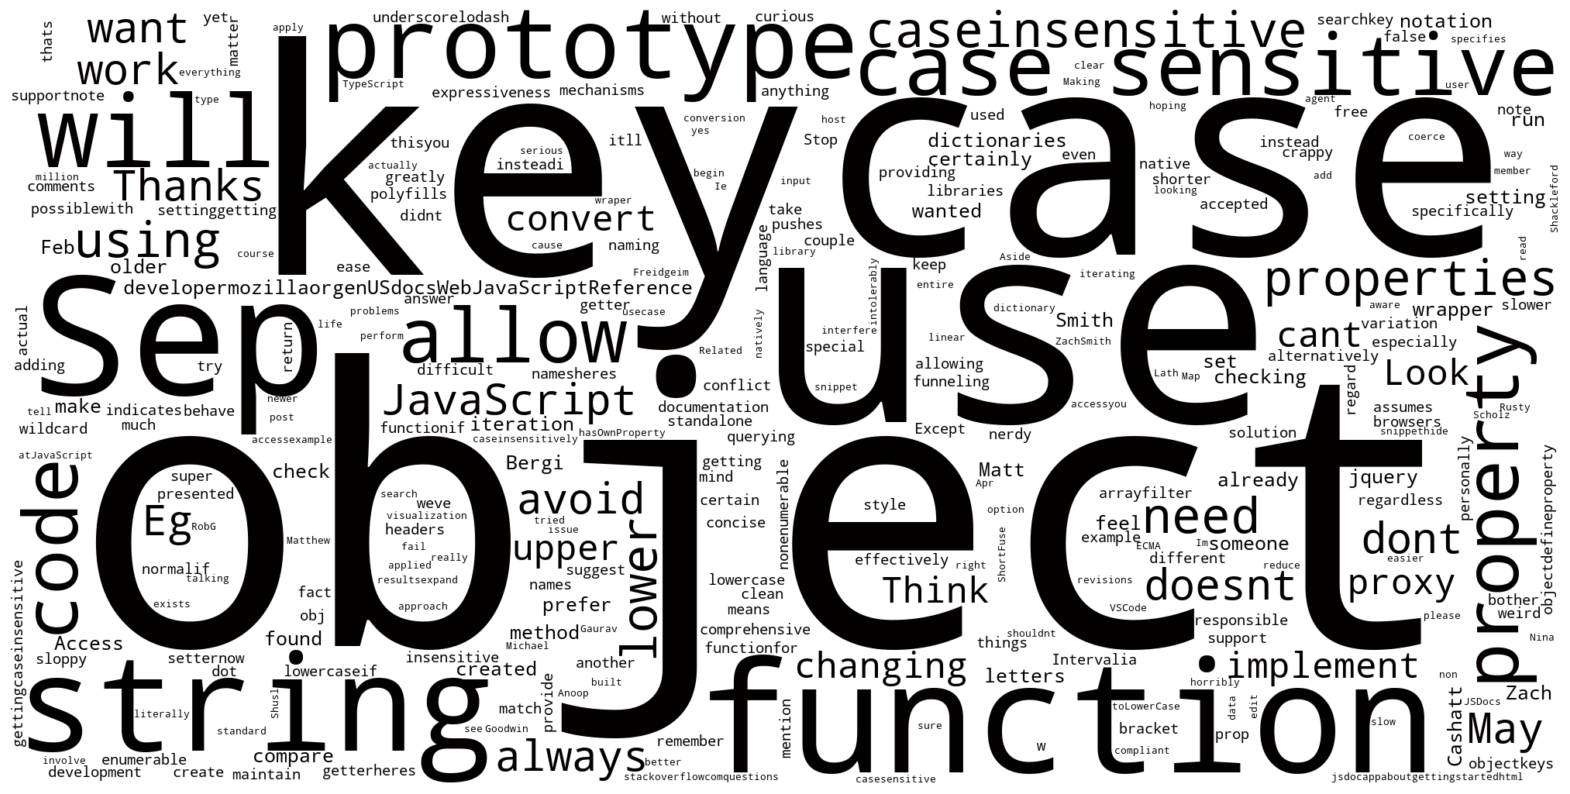

In [150]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud( background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

## 5. Sentiment Analysis

#### 5.1 Preparing the sentences

In [151]:
allCommentsGroupedCleanedSentDict = copy.deepcopy(allCommentsGroupedCleanedDict)

allCommentsGroupedCleanedSentDict = {k: v for k, v in allCommentsGroupedCleanedSentDict.items() if v['comments'] or v['answers'] or v['answer_comments']}
for key, value in allCommentsGroupedCleanedSentDict.items():
  del value['answers_cmts_joined']
  del value['answers_joined']
  del value['comments_joined']
  
  # make new key 
  value['all_sentences'] = []
  all_comments_arr = []
  all_answers_arr = []
  all_answer_cmts_arr = []
   
  for comment in value['comments']:
    if comment['comment']: 
      all_comments_arr.append(comment['comment'])
    
  for answer in value['answers']:
    if answer['answer']:
      all_answers_arr.append(answer['answer'])
    
  for answer_cmt in value['answer_comments']:
    if answer_cmt['answer_cmt']:
      all_answer_cmts_arr.append(answer_cmt['answer_cmt'])

  value['all_sentences'] =  all_comments_arr + all_answers_arr + all_answer_cmts_arr
  
  # sentence tokenization
  value['all_sentences'] = [sent_tokenize(sentence) for sentence in value['all_sentences']]
  # flatten 
  value['all_sentences'] = [item for sublist in value['all_sentences'] for item in sublist]

print(yaml.dump(allCommentsGroupedCleanedSentDict, allow_unicode=True, default_flow_style=False))

Access JavaScript property case-insensitively?:
  all_sentences:
  - You can't.
  - The language is case sensitive.
  - Think about
  - Always keep your actual property names as all lower-case (or upper), and then
    convert when querying.
  - 'Look at JavaScript proxy objects to implement was is effectively a means of changing
    a wildcard getter: developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/…'
  - Do NOT do this.
  - Stop providing mechanisms to allow sloppy development.
  - Keys are case sensitive.
  - If you allow someone else to use a key with different case then you are allowing
    them to create crappy code that is difficult to maintain, not to mention slower
    since you have to run special code to allow the keys to match when they should
    not.
  - '@Intervalia Except that certain things are case-insensitive regardless of how
    you personally feel about it.'
  - E.g., if I want to check HTTP headers, they are case insensitive.
  - I would greatly prefer t

##### 5.2 Scoring post with sentiment

In [152]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
config = AutoConfig.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

allCommentsGroupedCleanedSentDict = copy.deepcopy(allCommentsGroupedCleanedSentDict)

for key, value in allCommentsGroupedCleanedSentDict.items():
  list_of_sentences = value['all_sentences']
  print('working on', key, 'with', len(list_of_sentences), 'sentences')
  output = model(**tokenizer(list_of_sentences, padding=True, truncation=True, return_tensors="pt"))

  list_of_sentences_with_sentiment = []

  for j in range(len(list_of_sentences)):
    scores = output[0][j].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]

        if(list_of_sentences[j] not in [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment]):
          list_of_sentences_with_sentiment.append(
            {
              'sentence': list_of_sentences[j],
              l:  np.round(float(s), 4),
            }
          )
        else:
          index =  [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment].index(list_of_sentences[j])
          list_of_sentences_with_sentiment[index][l] = np.round(float(s), 4)
        

  averagePositiveSentimentScore = sum([ sentence['positive'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  averageNegativeSentimentScore = sum([ sentence['negative'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  averageNeutralSentimentScore = sum([ sentence['neutral'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  
  value['all_sentences_with_sentiment'] = list_of_sentences_with_sentiment
  value['avg_positive_sentiment'] = averagePositiveSentimentScore
  value['avg_negative_sentiment'] = averageNegativeSentimentScore
  value['avg_neutral_sentiment'] = averageNeutralSentimentScore

print(yaml.dump(allCommentsGroupedCleanedSentDict, allow_unicode=True, default_flow_style=False))

working on Are javascript object keys case sensitive? with 13 sentences
working on Access JavaScript property case-insensitively? with 60 sentences
working on Javascript - Compiled language? with 6 sentences
working on JavaScript reset event with 2 sentences
working on JavaScript Data Types with 15 sentences
working on JavaScript eval with 217 sentences
working on Is JavaScript a pass-by-reference or pass-by-value language? with 480 sentences
working on JavaScript check if time ranges overlap with 28 sentences
working on Run JavaScript after every time page is loaded with 2 sentences
working on Maps JavaScript API shapes with 2 sentences
working on Loading remote JavaScript file in a page with 22 sentences
working on Hide Javascript on site with 18 sentences
working on JavaScript always returns true with 12 sentences
Access JavaScript property case-insensitively?:
  all_sentences:
  - You can't.
  - The language is case sensitive.
  - Think about
  - Always keep your actual property na

## 6. Rank Post

In [153]:
warnings.filterwarnings('ignore')

allCommentsSentiment = copy.deepcopy(allCommentsGroupedCleanedSentDict)

# sort by avg positive sentiment
allCommentsSentiment = {k: v for k, v in allCommentsSentiment.items() if v['avg_positive_sentiment'] or v['avg_negative_sentiment'] or v['avg_neutral_sentiment']}
allCommentsSentiment = {k: v for k, v in sorted(allCommentsSentiment.items(), key=lambda item: item[1]['avg_positive_sentiment'], reverse=True)}

ACS_df = pd.DataFrame()
for key, value in list(allCommentsSentiment.items()):
  row_data = {
    'title': key,
    'avg_positive_sentiment': value['avg_positive_sentiment'],
    'avg_negative_sentiment': value['avg_negative_sentiment'],
    'avg_neutral_sentiment': value['avg_neutral_sentiment'],
    'sentence_list': value['all_sentences']
  }

  ACS_df = pd.concat([ACS_df, pd.DataFrame([row_data])], ignore_index=True)

warnings.resetwarnings()

ACS_df = ACS_df.sort_values(by=['avg_positive_sentiment'], ascending=False)
display(ACS_df.head(10))

title  avg_positive_sentiment  avg_negative_sentiment  avg_neutral_sentiment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentence_list
0                          JavaScript reset event                0.252150                0.338300               0.409500                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [Take some time and provide well formatted code in your questions., people its not code that was just an example of div,click event and append]
1         JavaScript check if time ranges overlap                0.179054                0.193079               0.627868  [So you do not want to check overlapping time if there are only 2 entries?, Are they always going to be on the same day?, Yes, all on the same day!, I will check every time before a new object is pushed to array, Have you tried anything?, Show your attempt., The simplest solution is half of line of code., let assume we have some intervalsif we want to add new interval to this list we should check if new interval is not overlapping with some of them.you can loop trough intervals and check if the new one is overlapping with others., note that when comparing intervals you do not need date obj...
2                  JavaScript always returns true                0.174050                0.180075               0.645867  [you codes need to be re-factored!, !, Hi @karthik could you show an example of your html as well please?, Could you put it on jsfiddle.net?, s i copied it in jsfiddle.net, besides the refactoring advices, the easiest thing would be to use firebug and debug what is doing wrong., it will save you a lot of headaches, change to in javascript below all will return truesolutionbelow all will return falsethe "==" and "!=" operator will try to coerce the two values into the same type before the comparison is made.the "===" and "!==" operator (also know as identity operators) check the type and va...
3                         Hide Javascript on site                0.158750                0.185806               0.655431  [css?, stackoverflow.com/q/35393429/3462319, It looks like you can't show the menu without JavaScript, it's dynamically created with JS, it's not included in the original markup., What i want is the Javascript itself to be executed because then the desktop menu wont be show but i want the "Please choose page" and the list / box itself to be hidden like it's never even been there., Can this be done somehow ?, Users should only se a white space where insteed of the box shown in the image., Welcome!!, This seems like an X/Y problem., Why don't you just use CSS to hide/display the menus depend...
4  Access JavaScript property case-insensitively?                0.155150                0.202352               0.642500  [You can't., The language is case sensitive., Think about, Always keep your actual property names as all lower-case (or upper), and then convert when querying., Look at JavaScript proxy objects to implement was is effectively a means of changing a wildcard getter: developer.mozilla.org/en-US/docs/Web/JavaScript

#### 6.1 Rank Post Result Analysis

In [154]:
import warnings
warnings.filterwarnings('ignore')

second_summary_filtered = ACS_df.head(10)

second_summary_filtered_df = pd.DataFrame(columns=['title', 'avg_positive_sentiment', 'avg_negative_sentiment', 'avg_neutral_sentiment' 'sentences_grouped'])
for index, row in second_summary_filtered.iterrows():
  sentences_grouped = []
  for sentence in row['sentence_list']:
    sentences_grouped.append(sentence)
      
    row_data = {
        'title': row['title'],
        'avg_positive_sentiment': row['avg_positive_sentiment'],
        'avg_negative_sentiment': row['avg_negative_sentiment'],
        'avg_neutral_sentiment': row['avg_neutral_sentiment'],
        'sentences_grouped': "".join(sentences_grouped)
    }

    second_summary_filtered_df = pd.concat([second_summary_filtered_df, pd.DataFrame([row_data])], ignore_index=True)

all_sentences = ""

for index, row in second_summary_filtered_df.iterrows():
  all_sentences += row['sentences_grouped']

warnings.resetwarnings()

print(len(all_sentences))

2443140


#### 6.2 Plot Word Cloud

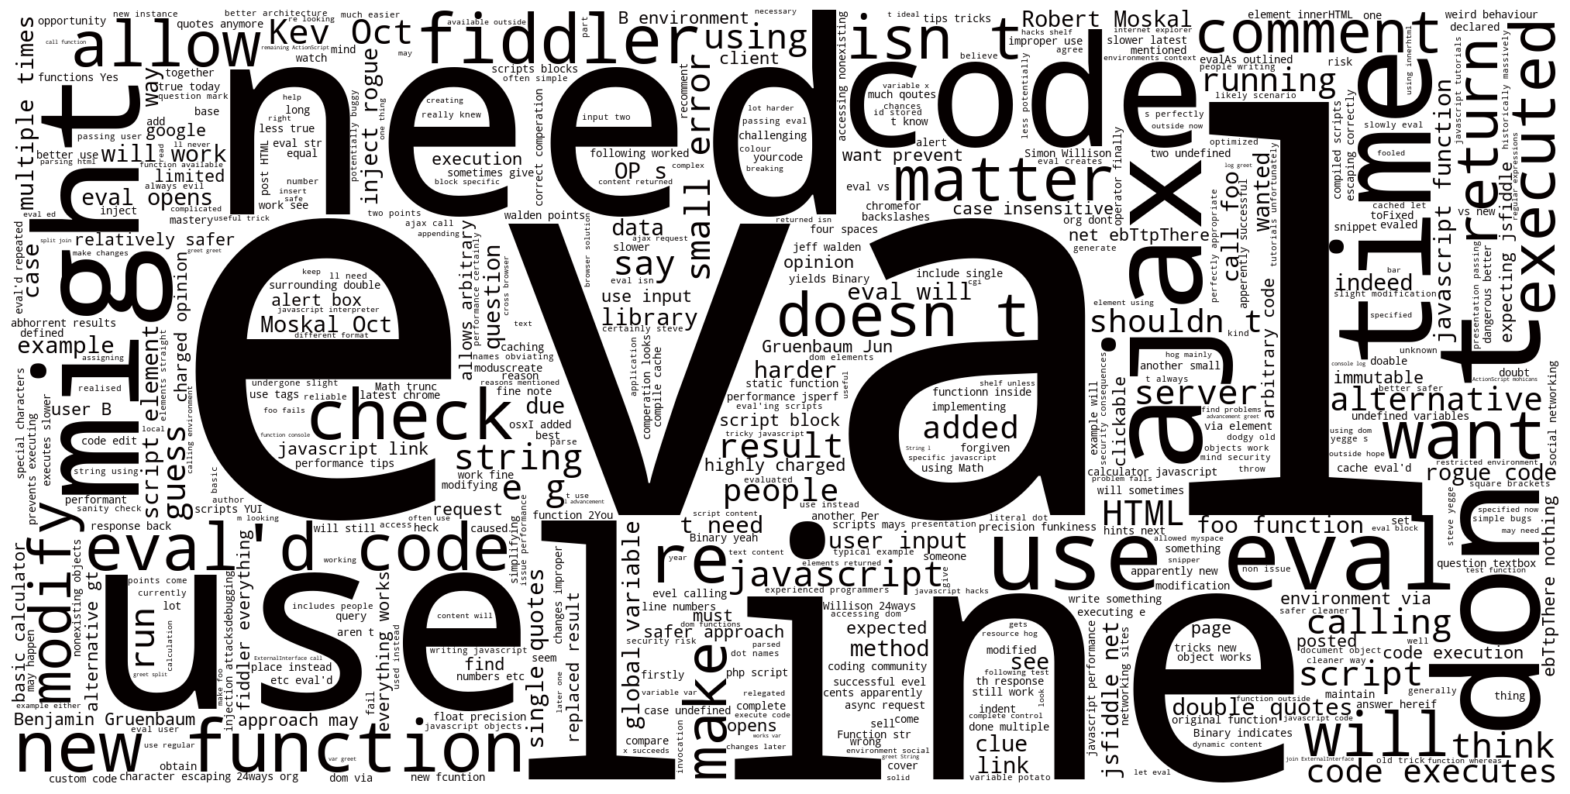

In [155]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud( background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

## 7. Summarize Top 5 

In [156]:
allCommentsSentimentSum = copy.deepcopy(allCommentsSentiment)
#only take top 5
allCommentsSentimentSum = {k: v for k, v in list(allCommentsSentimentSum.items())[:5]}

top_5_ACS_df = ACS_df.head(5)
display(top_5_ACS_df)

top_5_ACS_dict = top_5_ACS_df.to_dict('index')

print(top_5_ACS_dict)

title  avg_positive_sentiment  avg_negative_sentiment  avg_neutral_sentiment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentence_list
0                          JavaScript reset event                0.252150                0.338300               0.409500                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [Take some time and provide well formatted code in your questions., people its not code that was just an example of div,click event and append]
1         JavaScript check if time ranges overlap                0.179054                0.193079               0.627868  [So you do not want to check overlapping time if there are only 2 entries?, Are they always going to be on the same day?, Yes, all on the same day!, I will check every time before a new object is pushed to array, Have you tried anything?, Show your attempt., The simplest solution is half of line of code., let assume we have some intervalsif we want to add new interval to this list we should check if new interval is not overlapping with some of them.you can loop trough intervals and check if the new one is overlapping with others., note that when comparing intervals you do not need date obj...
2                  JavaScript always returns true                0.174050                0.180075               0.645867  [you codes need to be re-factored!, !, Hi @karthik could you show an example of your html as well please?, Could you put it on jsfiddle.net?, s i copied it in jsfiddle.net, besides the refactoring advices, the easiest thing would be to use firebug and debug what is doing wrong., it will save you a lot of headaches, change to in javascript below all will return truesolutionbelow all will return falsethe "==" and "!=" operator will try to coerce the two values into the same type before the comparison is made.the "===" and "!==" operator (also know as identity operators) check the type and va...
3                         Hide Javascript on site                0.158750                0.185806               0.655431  [css?, stackoverflow.com/q/35393429/3462319, It looks like you can't show the menu without JavaScript, it's dynamically created with JS, it's not included in the original markup., What i want is the Javascript itself to be executed because then the desktop menu wont be show but i want the "Please choose page" and the list / box itself to be hidden like it's never even been there., Can this be done somehow ?, Users should only se a white space where insteed of the box shown in the image., Welcome!!, This seems like an X/Y problem., Why don't you just use CSS to hide/display the menus depend...
4  Access JavaScript property case-insensitively?                0.155150                0.202352               0.642500  [You can't., The language is case sensitive., Think about, Always keep your actual property names as all lower-case (or upper), and then convert when querying., Look at JavaScript proxy objects to implement was is effectively a means of changing a wildcard getter: developer.mozilla.org/en-US/docs/Web/JavaScript

{0: {'title': 'JavaScript reset event', 'avg_positive_sentiment': 0.25215, 'avg_negative_sentiment': 0.3383, 'avg_neutral_sentiment': 0.4095, 'sentence_list': ['Take some time and provide well formatted code in your questions.', 'people its not code that was just an example of div,click event and append']}, 1: {'title': 'JavaScript check if time ranges overlap', 'avg_positive_sentiment': 0.17905357142857142, 'avg_negative_sentiment': 0.19307857142857143, 'avg_neutral_sentiment': 0.6278678571428571, 'sentence_list': ['So you do not want to check overlapping time if there are only 2 entries?', 'Are they always going to be on the same day?', 'Yes, all on the same day!', 'I will check every time before a new object is pushed to array', 'Have you tried anything?', 'Show your attempt.', 'The simplest solution is half of line of code.', 'let assume we have some intervalsif we want to add new interval to this list we should check if new interval is not overlapping with some of them.you can loo

#### 7.1 Using BartLargeCNN by Hugging Face

In [157]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

top_5_ACS_dict_BART = copy.deepcopy(top_5_ACS_dict)

for key, value in top_5_ACS_dict_BART.items():
    print("Summarizing ", key)
    joined_sentence = ' '.join(value['sentence_list'])
    if len(joined_sentence) > 1024:
      joined_sentence = joined_sentence[:1020] 
    input_ids = tokenizer.encode(joined_sentence, return_tensors='pt')
    summary_ids = model.generate(input_ids)
    top_5_ACS_dict_BART[key]['summary'] = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
print(yaml.dump(top_5_ACS_dict_BART, allow_unicode=True, default_flow_style=False))

Summarizing  0


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Summarizing  1
Summarizing  2
Summarizing  3
Summarizing  4
0:
  avg_negative_sentiment: 0.3383
  avg_neutral_sentiment: 0.4095
  avg_positive_sentiment: 0.25215
  sentence_list:
  - Take some time and provide well formatted code in your questions.
  - people its not code that was just an example of div,click event and append
  summary: Take some time and provide well formatted code in your questions. people
    its not code that was just an example of div,click event and append. Take some
    time to make sure that your code is well formatted and well-written. People are
    looking for well-formatted code, not just simple code.
  title: JavaScript reset event
1:
  avg_negative_sentiment: 0.19307857142857143
  avg_neutral_sentiment: 0.6278678571428571
  avg_positive_sentiment: 0.17905357142857142
  sentence_list:
  - So you do not want to check overlapping time if there are only 2 entries?
  - Are they always going to be on the same day?
  - Yes, all on the same day!
  - I will check 

##### 7.1.1 Bart Large CNN Result Analysis

In [158]:
import warnings
warnings.filterwarnings('ignore')

third_summary_filtered = pd.DataFrame(top_5_ACS_dict_BART).T
display(third_summary_filtered)

all_sentences = ""
for index, row in third_summary_filtered.iterrows():
  all_sentences += row['summary']

warnings.resetwarnings()

print(len(all_sentences))

title avg_positive_sentiment avg_negative_sentiment avg_neutral_sentiment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentence_list                                                                                                                                                                                                                                                                                                                                summary
0                          JavaScript reset event                0.25215                 0.3383                0.4095                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [Take some time and provide well formatted code in your questions., people its not code that was just an example of div,click event and append]                                         Take some time and provide well formatted code in your questions. people its not code that was just an example of div,click event and append. Take some time to make sure that your code is well formatted and well-written. People are looking for well-formatted code, not just simple code.
1         JavaScript check if time ranges overlap               0.179054               0.193079              0.627868  [So you do not want to check overlapping time if there are only 2 entries?, Are they always going to be on the same day?, Yes, all on the same day!, I will check every time before a new object is pushed to array, Have you tried anything?, Show your attempt., The simplest solution is half of line of code., let assume we have some intervalsif we want to add new interval to this list we should check if new interval is not overlapping with some of them.you can loop trough intervals and check if the new one is overlapping with others., note that when comparing intervals you do not need date obj...                                                                             So you do not want to check overlapping time if there are only 2 entries? Are they always going to be on the same day? Yes, all on thesame day! I will check every time before a new object is pushed to array Have you tried anything? Show your attempt.
2                  JavaScript always returns true                0.17405               0.180075              0.645867  [you codes need to be re-factored!, !, Hi @karthik could you show an example of your html as well please?, Could you put it on jsfiddle.net?, s i copied it in jsfiddle.net, besides the refactoring advices, the easiest thing would be to use firebug and debug what is doing wrong., it will save you a lot of headaches, change to in javascript below all will return truesolutionbelow all will return falsethe "==" and "!=" operator will try to coerce the two values into the same type before the comparison is made.the "===" and "!==" operator (also know as identity operators) check the type and va...                  you codes need to be re-factored!! Hi @karthik could you show an example of your html as well please? Could you put it on jsfiddle.net? s i copied it in jsfiddles.net bes

1477


#### 7.1.2 Plot Word Cloud

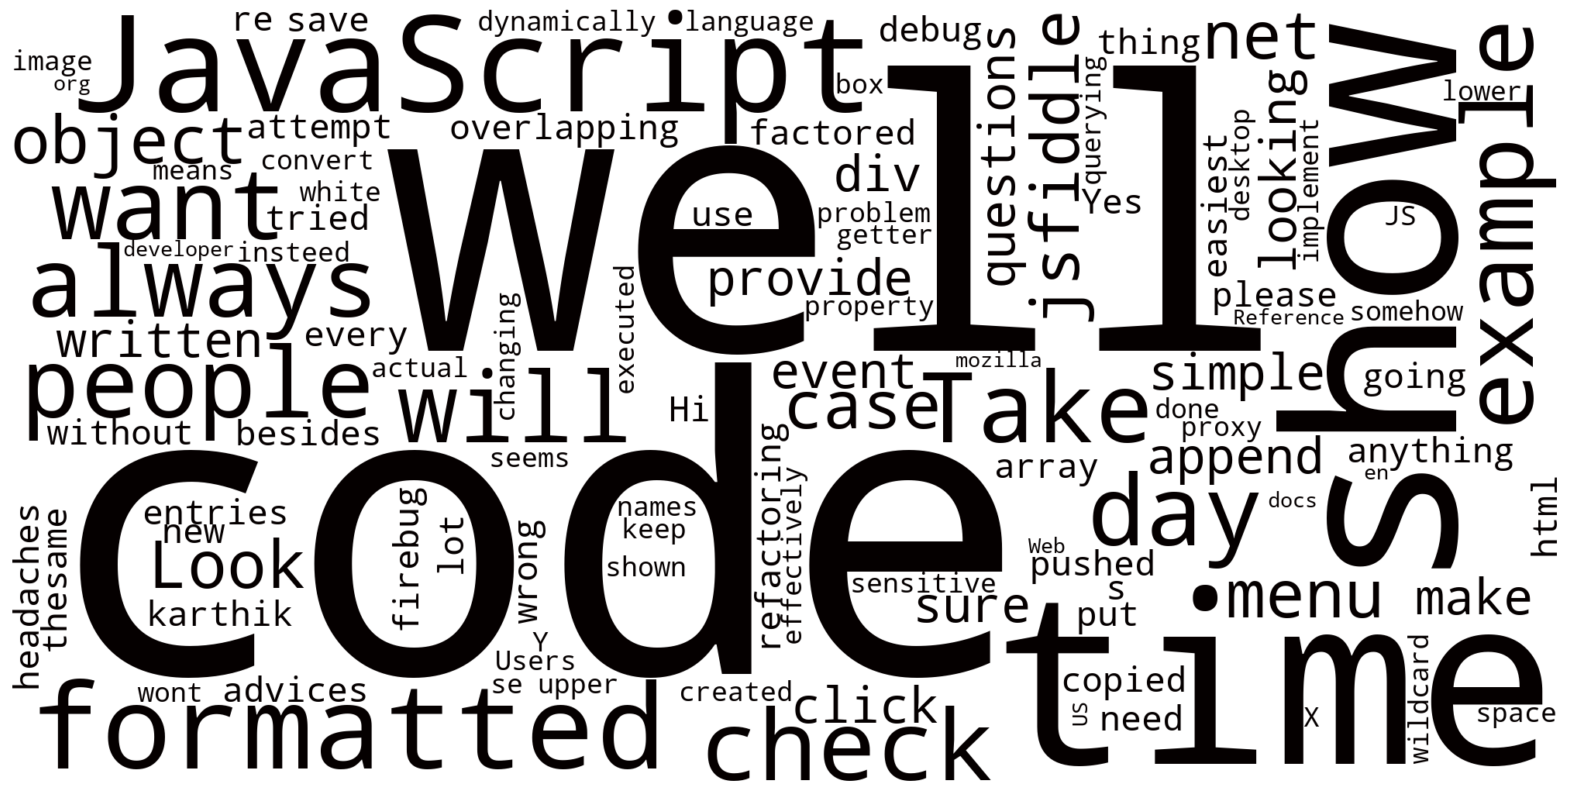

In [159]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud( background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

### 7.2 Pegasus-XSUM

In [160]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/pegasus-xsum")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-xsum")

top_5_ACS_dict_PXSUM = copy.deepcopy(top_5_ACS_dict)

for key, value in top_5_ACS_dict_PXSUM.items():
    print("Summarizing ", key)
    joined_sentence = ' '.join(value['sentence_list'])
    if len(joined_sentence) > 1024:
      joined_sentence = joined_sentence[:1020] 
    input_ids = tokenizer.encode(joined_sentence, return_tensors='pt')
    summary_ids = model.generate(input_ids)
    top_5_ACS_dict_PXSUM[key]['summary'] = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
# print(yaml.dump(top_5_ACS_dict_PXSUM, allow_unicode=True, default_flow_style=False))

Summarizing  0


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (64) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Summarizing  1
Summarizing  2
Summarizing  3
Summarizing  4


#### 7.2.1 Pegasus XSUM Result Analysis

In [161]:
import warnings
warnings.filterwarnings('ignore')

third_summary_filtered = pd.DataFrame(top_5_ACS_dict_PXSUM).T
display(third_summary_filtered)

all_sentences = ""
for index, row in third_summary_filtered.iterrows():
  all_sentences += row['summary']

warnings.resetwarnings()

print(len(all_sentences))

title avg_positive_sentiment avg_negative_sentiment avg_neutral_sentiment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentence_list                                                                                                                                                                                                                                                                                       summary
0                          JavaScript reset event                0.25215                 0.3383                0.4095                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [Take some time and provide well formatted code in your questions., people its not code that was just an example of div,click event and append]                                                                                                                                                                                                                                                             Do you have a question about php?
1         JavaScript check if time ranges overlap               0.179054               0.193079              0.627868  [So you do not want to check overlapping time if there are only 2 entries?, Are they always going to be on the same day?, Yes, all on the same day!, I will check every time before a new object is pushed to array, Have you tried anything?, Show your attempt., The simplest solution is half of line of code., let assume we have some intervalsif we want to add new interval to this list we should check if new interval is not overlapping with some of them.you can loop trough intervals and check if the new one is overlapping with others., note that when comparing intervals you do not need date obj...                                                                                                                                                                                                                       Is there a way to check if an interval is overlapping with another one?
2                  JavaScript always returns true                0.17405               0.180075              0.645867  [you codes need to be re-factored!, !, Hi @karthik could you show an example of your html as well please?, Could you put it on jsfiddle.net?, s i copied it in jsfiddle.net, besides the refactoring advices, the easiest thing would be to use firebug and debug what is doing wrong., it will save you a lot of headaches, change to in javascript below all will return truesolutionbelow all will return falsethe "==" and "!=" operator will try to coerce the two values into the same type before the comparison is made.the "===" and "!==" operator (also know as identity operators) check the type and va...  @karthik you need to use firebug to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in
3                       

494


### 7.3 Fine-tuned BART

In [162]:
import pandas as pd
from fastai.text.all import *
from transformers import *
from blurr.data.all import *
from blurr.modeling.all import *
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm

pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR.get_hf_objects(pretrained_model_name, 
                                                                  model_cls=BartForConditionalGeneration)

hf_batch_tfm = HF_Seq2SeqBeforeBatchTransform(hf_arch, hf_config, hf_tokenizer, hf_model, task='summarization',
text_gen_kwargs={'max_length': 248,
 'min_length': 56,
 'do_sample': False,
 'early_stopping': True,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False})

blocks = (HF_Seq2SeqBlock(before_batch_tfm=hf_batch_tfm), noop)

dblock = DataBlock(blocks=blocks, get_x=ColReader('content'), get_y=ColReader('title'), splitter=RandomSplitter())

# Load the validation data
validation_df = pd.read_csv('./fine-tuning-text-summ-bart/sosum-data/processed_answer.csv')

# Preprocess the validation data
validation_df['content'] = validation_df['content'].apply(lambda x: x.replace('/', ''))
validation_df['content'] = validation_df['content'].apply(lambda x: x.replace('\xa0', ''))

dls = dblock.dataloaders(validation_df, bs=2)

seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'fr' },
            'returns': ["precision", "recall", "f1"]
        }
    }

model = HF_BaseModelWrapper(hf_model)
learn_cbs = [HF_BaseModelCallback]
fit_cbs = [HF_Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics),  Recorder()]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.load('revised-bart_sosum_finetuned-opt')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [164]:
import copy
top_5_ACS_dict_FINET_BART = copy.deepcopy(top_5_ACS_dict)

for key, value in top_5_ACS_dict_FINET_BART.items():
    print("Summarizing ", key)
    joined_sentence = ' '.join(value['sentence_list'])
    if len(joined_sentence) > 1024:
      joined_sentence = joined_sentence[:1020] 
  
    output = learn.blurr_generate(joined_sentence, early_stopping=True, num_beams=4, max_length=248, min_length=56)
    top_5_ACS_dict_FINET_BART[key]['summary'] = output

Summarizing  0
Summarizing  1
Summarizing  2
Summarizing  3
Summarizing  4


#### 7.2.2 Plot Word Cloud

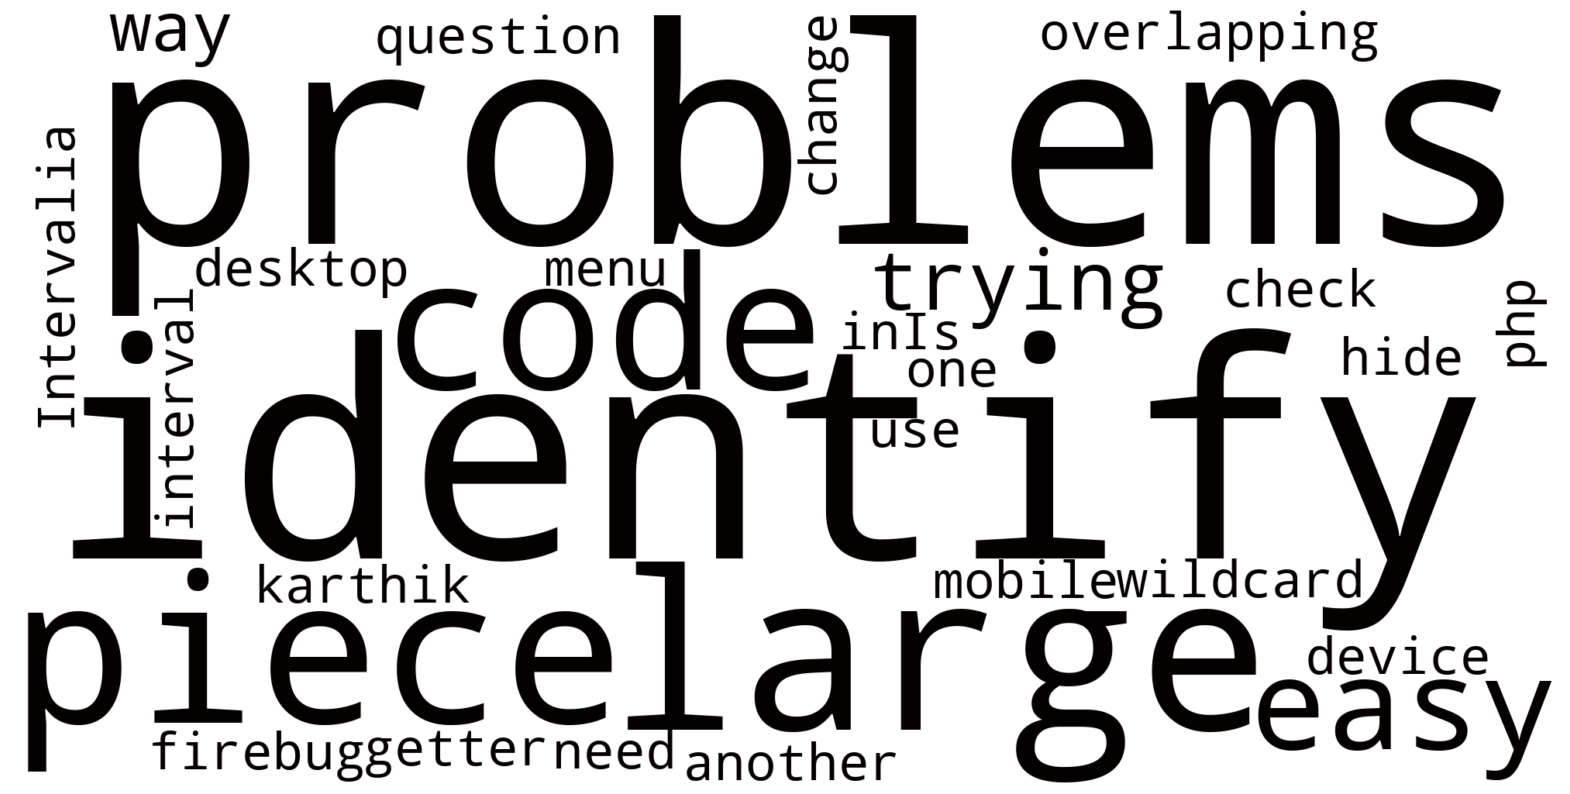

In [165]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud( background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

### 7.3 Comparing Both Deep Learning Models

##### We'll be comparing their summarized text based on a single question asked

In [166]:
pd.DataFrame(top_5_ACS_dict_PXSUM).T.to_csv('top_5_ACS_dict_PXSUM.csv')
pd.DataFrame(top_5_ACS_dict_BART).T.to_csv('top_5_ACS_dict_BART.csv')
pd.DataFrame(top_5_ACS_dict_FINET_BART).T.to_csv('top_5_ACS_dict_FINET_BART.csv')

In [167]:
pd.set_option('display.expand_frame_repr', False)

summary_compare_df =  pd.DataFrame(columns=['title', 'summary'])

# load from two files
top_5_ACS_dict_PXSUM = pd.read_csv('top_5_ACS_dict_PXSUM.csv')
top_5_ACS_dict_BART = pd.read_csv('top_5_ACS_dict_BART.csv')
top_5_ACS_dict_FINET_BART = pd.read_csv('top_5_ACS_dict_FINET_BART.csv')

pd.set_option('display.max_colwidth', None)

for index, row in top_5_ACS_dict_PXSUM.iterrows():
  row_data = {
    'title': row['title'],
    'summary': row['summary']
  }

  summary_compare_df = pd.concat([summary_compare_df, pd.DataFrame([row_data])], ignore_index=True)
  
display(summary_compare_df)

for index, row in top_5_ACS_dict_BART.iterrows():
  row_data = {
    'title': row['title'],
    'summary': row['summary']
  }

  summary_compare_df = pd.concat([summary_compare_df, pd.DataFrame([row_data])], ignore_index=True)
  
display(summary_compare_df)

for index, row in top_5_ACS_dict_FINET_BART.iterrows():
  row_data = {
    'title': row['title'],
    'summary': row['summary']
  }

  summary_compare_df = pd.concat([summary_compare_df, pd.DataFrame([row_data])], ignore_index=True)
  
display(summary_compare_df)

end_time = time.time()
print(end_time - start_time) # time in seconds

title                                                                                                                                                                                                                                                                                       summary
0                          JavaScript reset event                                                                                                                                                                                                                                                             Do you have a question about php?
1         JavaScript check if time ranges overlap                                                                                                                                                                                                                       Is there a way to check if an interval is overlapping with another one?
2                  JavaScript always returns true  @karthik you need to use firebug to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in
3                         Hide Javascript on site                                                                                                                                                                                                                                   Is there a way to hide the desktop menu on a mobile device?
4  Access JavaScript property case-insensitively?                                                                                                                                                                                                                                               @Intervalia You can't change a wildcard getter.

title                                                                                                                                                                                                                                                                                                                                summary
0                          JavaScript reset event                                                                                                                                                                                                                                                                                                      Do you have a question about php?
1         JavaScript check if time ranges overlap                                                                                                                                                                                                                                                                Is there a way to check if an interval is overlapping with another one?
2                  JavaScript always returns true                                           @karthik you need to use firebug to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in
3                         Hide Javascript on site                                                                                                                                                                                                                                                                            Is there a way to hide the desktop menu on a mobile device?
4  Access JavaScript property case-insensitively?                                                                                                                                                                                                                                                                                        @Intervalia You can't change a wildcard getter.
5                          JavaScript reset event                                         Take some time and provide well formatted code in your questions. people its not code that was just an example of div,click event and append. Take some time to make sure that your code is well formatted and well-written. People are looking for well-formatted code, not just simple code.
6         JavaScript check if time ranges overlap                                                                             So you do not want to check overlapping time if there are only 2 entries? Are they always going to be on the same day? Yes, all on thesame day! I will check every time before a new object is pushed to array Have you tried anything? Show your attempt.
7                  JavaScript always returns true                  you codes need to be re-factored!! Hi @karthik could you show an example of your html as well please? Could you put it on jsfiddle.net? s i copied it in jsfiddles.net besides the refactoring advices, the easiest thing would be to use firebug and debug what is doing wrong. it will save you a lot of headaches.
8                         Hide Javascript on site  It looks like you can't show the menu without JavaScript, it's dynamically created with JS. What i want is the Javascript itself to be executed because then the desktop menu wont be show. Can this be done somehow? Users should only se a white space where insteed of the box shown in the image. This seems like an X/Y problem.
9  Access JavaScript property case-insensitively?                    You can't. The language is case sensitive. Always keep your actual property names as all lower-case (or upper), and then convert when querying. Look at JavaScript proxy objects to implement was is effectiv

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        summary
0                           JavaScript reset event                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Do you have a question about php?
1          JavaScript check if time ranges overlap                                                                                                                                                                                                                                                                                                                                                                                                                                        Is there a way to check if an interval is overlapping with another one?
2                   JavaScript always returns true                                                                                                                                                                                                                   @karthik you need to use firebug to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in a large piece of code like this is not easy, trying to identify problems in
3                          Hide Javascript on site                                                                                                                                                                                                                                                                                                                                                                                                                                                    Is there a way to hide the desktop menu on a mobile device?
4   Access JavaScript property case-insensitively?                                                                                                                                                                                                                                                                                                                                                                                                                                                                @Intervalia You can't change a wildcard getter.
5                           JavaScript reset event                                                                                                                                                                                                                 Take some time and provide well formatted code in your questions. people its not code that was just an example of div,click event and append. Take some time to make sure that your code is well formatted and well-written. People are looking for well-formatted code, not just simple code.
6          JavaScript check if time ranges overlap                                                                                                                                                                             

529.012716293335
